## Library Import

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras #type: ignore
from tensorflow.keras import layers #type: ignore
from tensorflow.keras.preprocessing.text import Tokenizer #type: ignore
from tensorflow.keras.preprocessing.sequence import pad_sequences #type: ignore


## Dataset Import

In [2]:
df = pd.read_csv("../../data/sms_with_features.csv")


## Data Preprocessing

In [3]:
df.isnull().sum().sum()
df.duplicated().sum()
df.drop_duplicates()


,label,message,char_count,word_count,num_count,has_url,has_email,has_currency,upper_ratio,special_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,0,0,0,0,0.027027,0
1,ham,Ok lar... Joking wif u oni...,29,6,0,0,0,0,0.068966,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,25,0,0,0,0.064516,0
3,ham,U dun say so early hor... U c already then say...,49,11,0,0,0,0,0.040816,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,0,0,0,0,0.032787,0
...,...,...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,30,21,0,0,1,0.056250,1
5568,ham,Will ü b going to esplanade fr home?,36,8,0,0,0,0,0.027778,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,10,0,0,0,0,0.035088,1
5570,ham,The guy did some bitching but I acted like i'd...,125,26,0,0,0,0,0.016000,0


## label Encoding （spam/ham → 0/1）


In [4]:

text_col = "message"    
label_col = "label"    

# Delete Missing Value
df = df.dropna(subset=[text_col, label_col])

encoder = LabelEncoder()
df["label_encoded"] = encoder.fit_transform(df[label_col])


## Data Split 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df[text_col],
    df["label_encoded"],
    test_size=0.2,
    random_state=42
)


## Tokenizer (text to vector)


In [6]:
# =============================
vocab_size = 10000   # 字典大小（可调整）
maxlen = 100          # 每个短信最多保留多少个单词

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequence length
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post', truncating='post')


## Construct LSTM model

In [7]:
model = keras.Sequential([
    layers.Embedding(vocab_size, 128, input_length=maxlen),
    layers.Bidirectional(layers.LSTM(64, dropout=0.3, recurrent_dropout=0.3)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])


c:\Degree\Machine Learning\Machine Learning Lab\assignment\Deep Learning Model\venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## Optimizer and Loss Function

In [8]:

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


## Train Model

In [9]:
model.summary()

history = model.fit(
    X_train_pad,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 54s 163ms/step - accuracy: 0.9142 - loss: 0.2336 - val_accuracy: 0.9720 - val_loss: 0.0834
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 17s 154ms/step - accuracy: 0.9885 - loss: 0.0448 - val_accuracy: 0.9809 - val_loss: 0.0747
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 18s 165ms/step - accuracy: 0.9950 - loss: 0.0194 - val_accuracy: 0.9821 - val_loss: 0.0836
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 22s 200ms/step - accuracy: 0.9983 - loss: 0.0066 - val_accuracy: 0.9832 - val_loss: 0.0927
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 20s 176ms/step - accuracy: 0.9997 - loss: 0.0014 - val_accuracy: 0.9843 - val_loss: 0.1068
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 20s 180ms/step - accuracy: 0.9997 - loss: 7.6008e-04 - val_accuracy: 0.9798 - val_loss: 0.1032
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 27s 242ms/step - accuracy: 1.0000 - loss: 2.5993e-04 - val_accuracy: 0.9821 - val_loss: 0.1271
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 25s 222ms/step - accuracy: 1.0000 -

## Evaluate Model

In [10]:
loss, acc = model.evaluate(X_test_pad, y_test)
print(f"✅ Test Accuracy: {acc:.4f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9910 - loss: 0.0757
✅ Test Accuracy: 0.9910


## Visualization

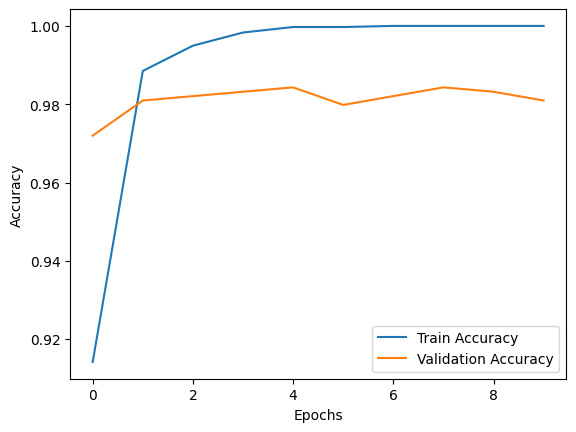

In [11]:

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


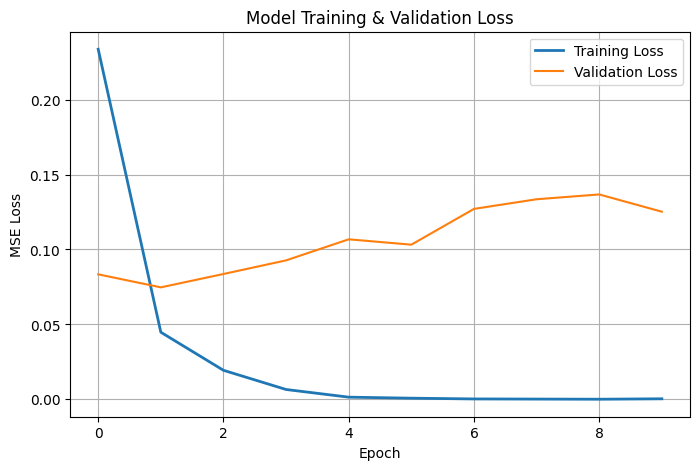

In [12]:
# Viszualization Training Procedure
plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Training Loss", linewidth=2)
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title('Model Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()